In [ ]:
import pandas as pd

# vars
fileMetadata = {}
tableDataList = []
metadataCsvFile = 'fsl/FSL_csv/FSL_csv/FTHP_metadata.csv'

metadata_df = pd.read_csv(metadataCsvFile)
numRowsMetaData = len(metadata_df)


for rowNum in range (numRowsMetaData):
    csvFile = 'fsl/FSL_csv/FSL_csv/fast_{}_seg.csv'.format(rowNum)

    with open(csvFile, 'r') as file:
        tableData = []
        isTable = False
        for line in file:
            if line.startswith('#'):
                parts = line.split()
                if len(parts) >= 2:
                    if parts[1] == "ColHeaders":
                        isTable = True
                        colHeaders = parts[2:]
                    elif not isTable:
                        fileMetadata[parts[1]] = ' '.join(parts[2:])
            elif isTable and line.strip():
                values = line.split()
                if len(values) == len(colHeaders):
                    tableData.append(values)

    if tableData:
        df = pd.DataFrame(tableData, columns=colHeaders)

        manufacturer_info = metadata_df.iloc[rowNum]['manufacturer']
        model_info = metadata_df.iloc[rowNum]['model']
        df['Manufacturer'] = manufacturer_info
        df['Model'] = model_info

        print(f"Data from file {csvFile}:")
        print(df)

        tableDataList.append(df)
    else:
        print(f"No table data found in the file {csvFile}.")

if tableDataList:
    concatenated_df = pd.concat(tableDataList, ignore_index=True)
    print("\nConcatenated DataFrame:")
    print(concatenated_df)

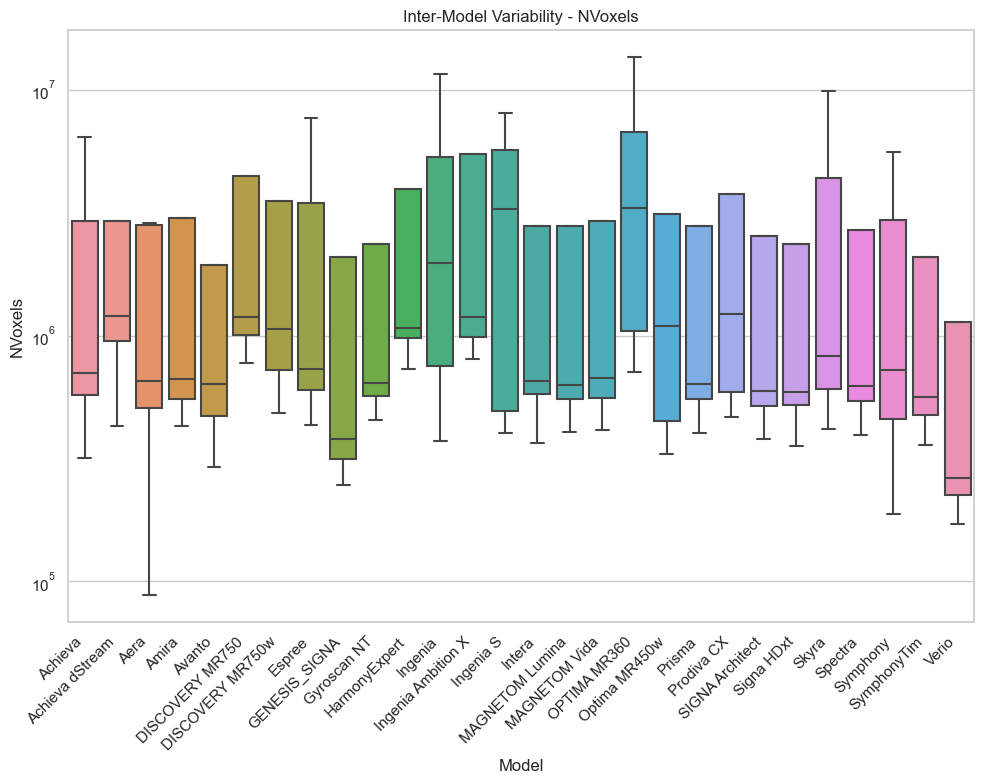

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of models (unique values in the 'Model' column)

#update to apply dataframe from parser
concatenated_df['NVoxels'] = pd.to_numeric(concatenated_df['NVoxels'], errors='coerce')
concatenated_df = concatenated_df.dropna(subset=['NVoxels'])

concatenated_df['Model'] = concatenated_df['Model'].astype('category')


plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')


sns.boxplot(x='Model', y='NVoxels', data=concatenated_df, sym='')

plt.title('Inter-Model Variability - NVoxels')
plt.xlabel('Model')
plt.ylabel('NVoxels')

# Set the y-axis to a logarithmic scale
plt.yscale('log')  

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

concatenated_df['Volume_mm3'] = pd.to_numeric(concatenated_df['Volume_mm3'], errors='coerce')
concatenated_df = concatenated_df.dropna(subset=['Volume_mm3'])
concatenated_df['Model'] = concatenated_df['Model'].astype('category')

# Compute the IQR for 'Volume_mm3'
Q1 = concatenated_df['Volume_mm3'].quantile(0.25)
Q3 = concatenated_df['Volume_mm3'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers by keeping only the valid values
concatenated_df = concatenated_df[~((concatenated_df['Volume_mm3'] < (Q1 - 1.5 * IQR)) | (concatenated_df['Volume_mm3'] > (Q3 + 1.5 * IQR)))]

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

sns.boxplot(x='Model', y='Volume_mm3', data=concatenated_df, sym='')

plt.title('Inter-Model Variability FSL - Total Volume')
plt.xlabel('Model')
plt.ylabel('Total Volume')

plt.yscale('log')
plt.ylim(auto=True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()